In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

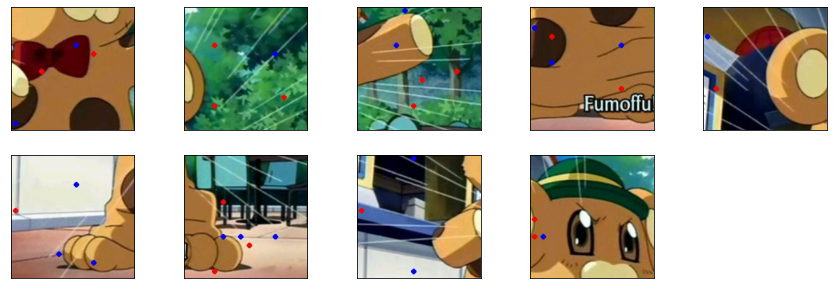

In [2]:
images = []
plt.figure(figsize=(15, 5))
for i, filename in enumerate(os.listdir('fumo')):
    img = cv2.imread(os.path.join('fumo',filename))
    
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 5, 1+i)
    plt.imshow(RGB_img)
    plt.xticks([])
    plt.yticks([])

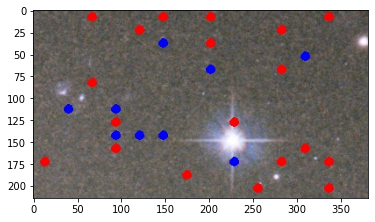

In [3]:
image = cv2.imread('galaxy/0rnAgrX75leCnt0v.jpg')
RGB_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_image)

In [4]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

In [5]:
# lower_blue = np.array([110, 50, 50])
# upper_blue = np.array([130, 255, 255])

In [6]:
lower_blue = np.array([110, 250, 250])
upper_blue = np.array([130, 255, 255])

In [7]:
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
result_blue = cv2.bitwise_and(image, image, mask=mask_blue)
# cv2.imshow('mask_blue', mask_blue)
# cv2.imshow('result_blue', result_blue)

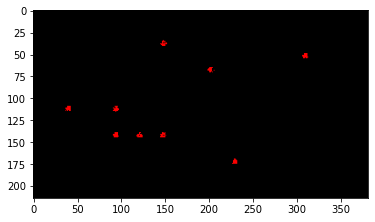

In [8]:
plt.imshow(result_blue)

In [9]:
lower_red = np.array([0, 240, 240])
upper_red = np.array([10, 255, 255])

In [10]:
mask_red = cv2.inRange(hsv, lower_red, upper_red)
result_red = cv2.bitwise_and(image, image, mask=mask_red)
# cv2.imshow('mask_red', mask_red)
# cv2.imshow('result_red', result_red)

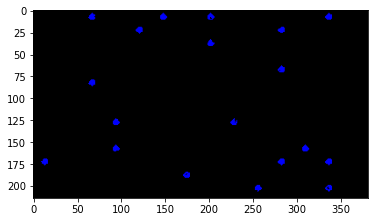

In [11]:
plt.imshow(result_red)

# Blue

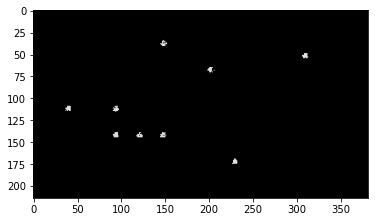

In [12]:
grey_blue = cv2.cvtColor(result_blue, cv2.COLOR_BGR2GRAY)
plt.imshow(grey_blue, cmap='gray')

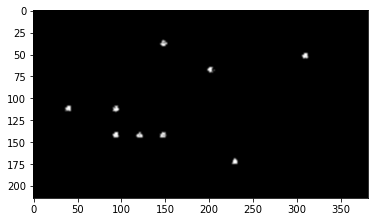

In [13]:
blur_blue = cv2.GaussianBlur(grey_blue, (3,3), 0)
plt.imshow(blur_blue, cmap='gray')

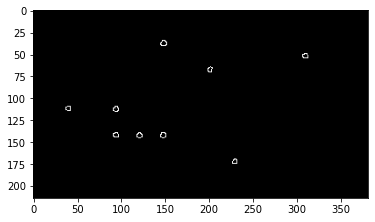

In [14]:
canny_blue = cv2.Canny(blur_blue, 30, 100)
plt.imshow(canny_blue, cmap='gray')

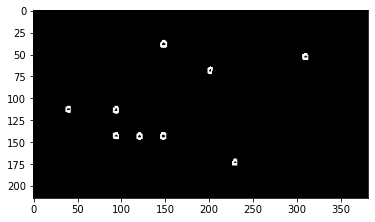

In [15]:
dilated_blue = cv2.dilate(canny_blue, (3,3), iterations=2)
plt.imshow(dilated_blue, cmap='gray')

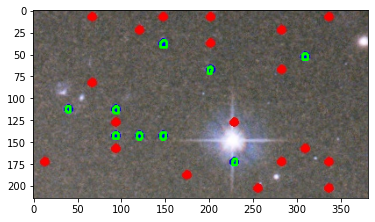

In [16]:
(cnt, hierarchy) = cv2.findContours(dilated_blue.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0,255,0), 2)

plt.imshow(rgb)

In [17]:
print(len(cnt))

9


# Red

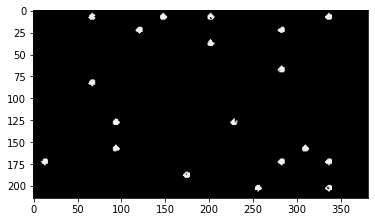

In [18]:
grey_red = cv2.cvtColor(result_red, cv2.COLOR_BGR2GRAY)
plt.imshow(grey_red, cmap='gray')

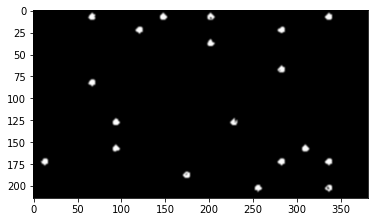

In [19]:
blur_red = cv2.GaussianBlur(grey_red, (3,3), 0)
plt.imshow(blur_red, cmap='gray')

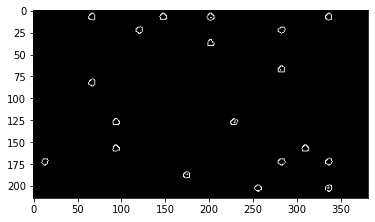

In [20]:
canny_red = cv2.Canny(grey_red, 30, 100)
plt.imshow(canny_red, cmap='gray')

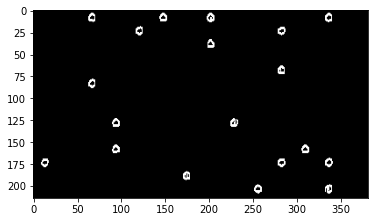

In [21]:
dilated_red = cv2.dilate(canny_red, (3,3), iterations=2)
plt.imshow(dilated_red, cmap='gray')

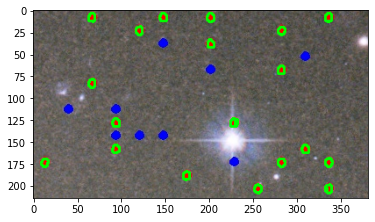

In [22]:
(cnt, hierarchy) = cv2.findContours(dilated_red.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0,255,0), 2)

plt.imshow(rgb)

In [23]:
print(len(cnt))

19


# Actual

In [24]:
def get_row(image):
    image = cv2.imread(image)
    RGB_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    lower_blue = np.array([115, 220, 220])
    upper_blue = np.array([130, 255, 255])

    mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
    result_blue = cv2.bitwise_and(image, image, mask=mask_blue)
    
    grey_blue = cv2.cvtColor(result_blue, cv2.COLOR_BGR2GRAY)
    blur_blue = cv2.GaussianBlur(grey_blue, (5, 5), 0)
    canny_blue = cv2.Canny(blur_blue, 30, 100)
    dilated_blue = cv2.dilate(canny_blue, (5, 5), iterations=2)
    
    (cnt, hierarchy) = cv2.findContours(dilated_blue.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    return len(cnt)

In [25]:
print(get_row('galaxy/0rnAgrX75leCnt0v.jpg'))

9


In [26]:
def get_col(image):
    image = cv2.imread(image)
    RGB_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([0, 220, 220])
    upper_red = np.array([10, 255, 255])

    mask_red = cv2.inRange(hsv, lower_red, upper_red)
    result_red = cv2.bitwise_and(image, image, mask=mask_red)
    
    grey_red = cv2.cvtColor(result_red, cv2.COLOR_BGR2GRAY)
    blur_red = cv2.GaussianBlur(grey_red, (5, 5), 0)
    canny_red = cv2.Canny(blur_red, 30, 100)
    dilated_red = cv2.dilate(canny_red, (5, 5), iterations=2)
    
    (cnt, hierarchy) = cv2.findContours(dilated_red.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    return len(cnt)

In [27]:
print(get_col('galaxy/0rnAgrX75leCnt0v.jpg'))

19


# Implementing on Fumo

In [28]:
plt.figure(figsize=(15, 5))
row = []
col = []
for i, filename in enumerate(os.listdir('fumo')):
    row.append(get_row(os.path.join('fumo',filename)))
    col.append(get_col(os.path.join('fumo',filename)))

print(row)
print(col)

[2, 1, 2, 3, 1, 3, 3, 2, 1]
[2, 3, 3, 2, 1, 1, 3, 1, 2]


<Figure size 1080x360 with 0 Axes>

In [29]:
max_row = max(row)
print('Max row is', max_row)

max_col = max(col)
print('Max col is', max_col)

total = max_row * max_col

Max row is 3
Max col is 3


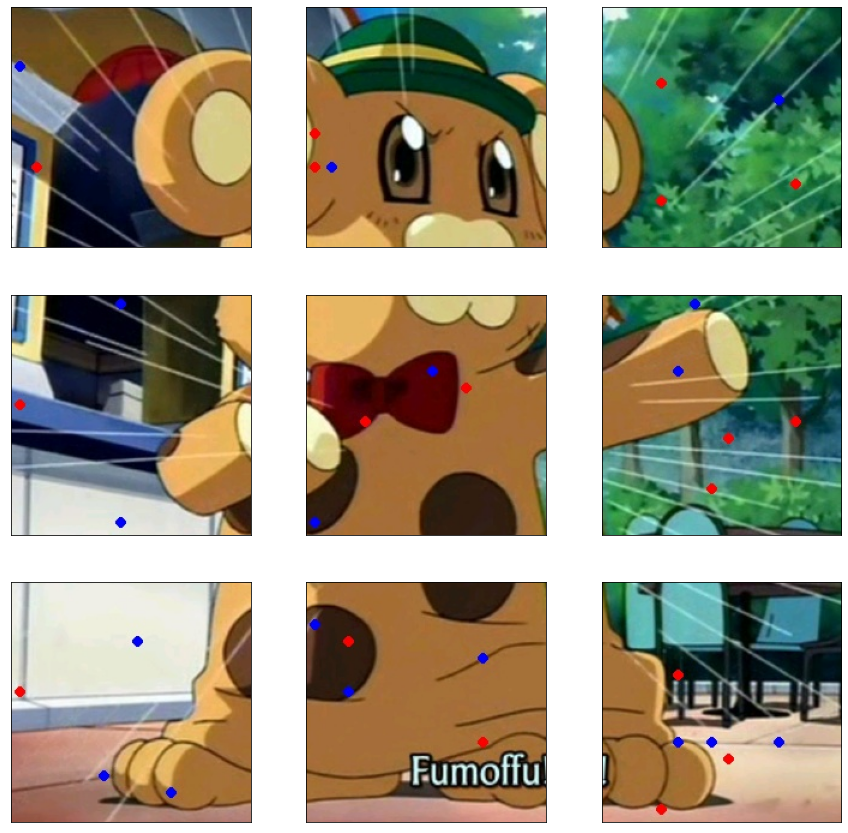

In [30]:
plt.figure(figsize=(15, 15))

for i, filename in enumerate(os.listdir('fumo')):
    img = cv2.imread(os.path.join('fumo',filename))
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.subplot(max_row, max_col, (row[i]-1)*max_col + col[i])
    plt.imshow(RGB_img)
    plt.xticks([])
    plt.yticks([])

plt.show()

# Implementing on Simple

In [31]:
plt.figure(figsize=(15, 5))
row = []
col = []
for i, filename in enumerate(os.listdir('simple')):
    row.append(get_row(os.path.join('simple',filename)))
    col.append(get_col(os.path.join('simple',filename)))

print(row)
print(col)

[2, 1, 1, 2]
[2, 2, 1, 1]


<Figure size 1080x360 with 0 Axes>

In [32]:
max_row = max(row)
print('Max row is', max_row)

max_col = max(col)
print('Max col is', max_col)

total = max_row * max_col

Max row is 2
Max col is 2


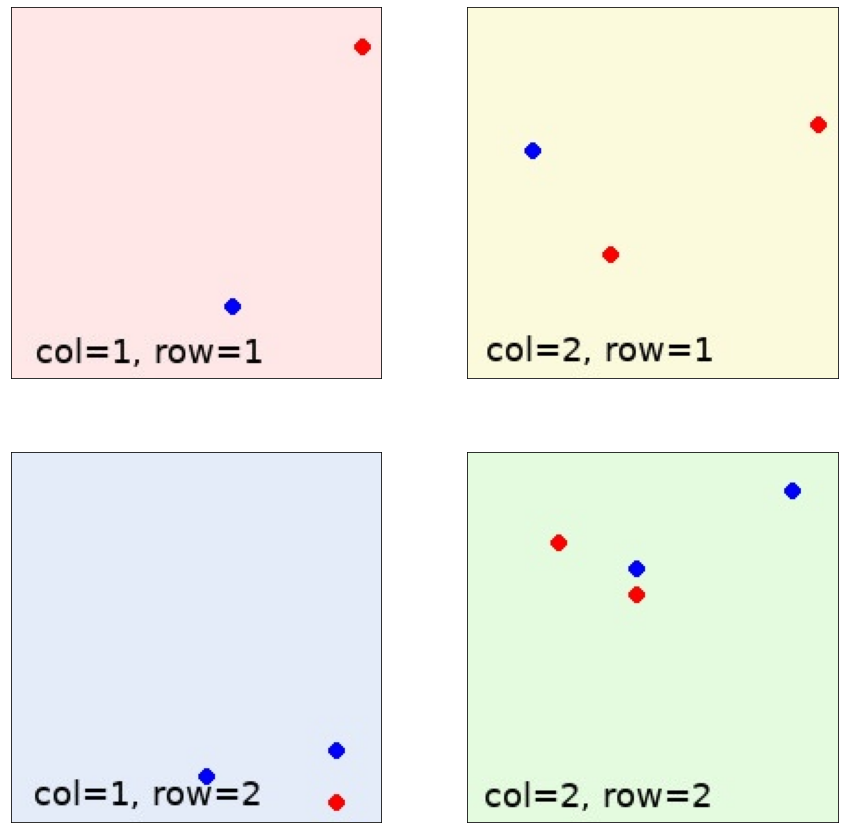

In [33]:
plt.figure(figsize=(15, 15))

for i, filename in enumerate(os.listdir('simple')):
    img = cv2.imread(os.path.join('simple',filename))
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.subplot(max_row, max_col, (row[i]-1)*max_col + col[i])
    plt.imshow(RGB_img)
    plt.xticks([])
    plt.yticks([])

plt.show()

# Implementing on Galaxy

In [34]:
plt.figure(figsize=(15, 5))
row = []
col = []
for i, filename in enumerate(os.listdir('galaxy')):
    row.append(get_row(os.path.join('galaxy',filename)))
    col.append(get_col(os.path.join('galaxy',filename)))

print(row)
print(col)

[30, 12, 3, 25, 11, 26, 24, 18, 9, 27, 7, 3, 24, 4, 29, 27, 19, 28, 21, 25, 25, 7, 27, 26, 9, 29, 3, 22, 23, 4, 7, 9, 7, 16, 8, 17, 17, 12, 11, 10, 13, 13, 11, 5, 29, 27, 18, 11, 24, 4, 3, 6, 1, 7, 29, 15, 8, 5, 26, 30, 14, 29, 14, 28, 21, 8, 6, 19, 16, 24, 20, 18, 25, 13, 22, 5, 1, 2, 24, 1, 29, 29, 27, 9, 8, 1, 23, 28, 3, 9, 22, 13, 18, 25, 14, 15, 3, 28, 13, 2, 19, 23, 13, 8, 4, 19, 12, 8, 5, 9, 14, 30, 27, 23, 14, 2, 6, 20, 20, 10, 20, 14, 16, 4, 20, 15, 21, 22, 2, 22, 28, 8, 3, 26, 23, 6, 12, 6, 29, 12, 11, 26, 7, 19, 27, 17, 6, 30, 9, 8, 10, 30, 9, 17, 3, 4, 26, 4, 1, 21, 9, 11, 3, 9, 20, 22, 21, 9, 22, 8, 16, 4, 30, 16, 25, 12, 9, 16, 25, 13, 15, 9, 16, 19, 15, 30, 30, 18, 6, 12, 12, 10, 21, 5, 1, 4, 12, 23, 28, 10, 18, 13, 5, 26, 22, 26, 8, 26, 24, 28, 30, 17, 4, 18, 23, 6, 22, 4, 10, 26, 12, 18, 23, 28, 4, 19, 18, 7, 12, 14, 14, 23, 25, 6, 1, 24, 14, 28, 17, 18, 25, 13, 10, 3, 2, 1, 1, 13, 27, 3, 20, 13, 7, 7, 11, 14, 24, 28, 24, 2, 25, 23, 27, 25, 22, 8, 21, 3, 24, 25, 24, 16

<Figure size 1080x360 with 0 Axes>

In [35]:
max_row = max(row)
print('Max row is', max_row)

max_col = max(col)
print('Max col is', max_col)

total = max_row * max_col

Max row is 30
Max col is 30


<ipython-input-36-582d59704bb0>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(max_row, max_col, (row[i]-1)*max_col + col[i])


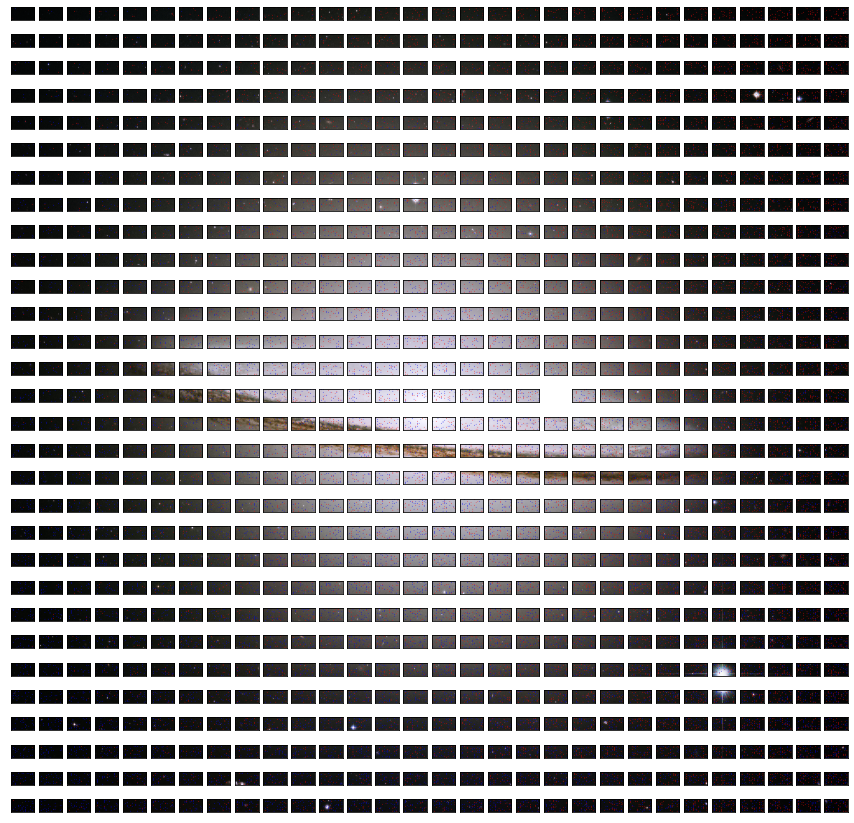

In [36]:
plt.figure(figsize=(15, 15))

for i, filename in enumerate(os.listdir('galaxy')):
    img = cv2.imread(os.path.join('galaxy',filename))
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.subplot(max_row, max_col, (row[i]-1)*max_col + col[i])
    plt.imshow(RGB_img)
    plt.xticks([])
    plt.yticks([])

plt.show()

In [37]:
# cv2.waitKey(0)
# cv2.destroyAllWindows()